(Aggarwal 2.7)

Download the Musk data set from the UCI Machine Learning Repository. Apply PCA to the data set, and report the eigenvectors and eigenvalues (hint: pca implemented in sklearn)

In [1]:
import pandas as pd
import numpy as np

labels=['molecule', 'conformation']+list(range(166)) +['class']
df = pd.read_csv('_musk/clean2.data', names=labels)

In [2]:
df

,molecule,conformation,0,1,2,3,4,5,6,7,...,157,158,159,160,161,162,163,164,165,class
0,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,...,-66,164,-14,-29,107,171,-44,-115,118,0.0
6594,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,...,-51,166,-9,150,129,158,-66,-144,-5,0.0
6595,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,...,90,117,-8,150,130,159,-66,-144,-6,0.0
6596,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,...,86,99,-14,-31,106,171,-44,-116,117,0.0


In [9]:
# rimuove le prime 2 colonne e l'ultima ed esporta i dati a un array NumPy
df2 = df.iloc[:, 2:-1]
d = df2.to_numpy(copy=True)
d.shape

(6598, 166)

In [10]:
d

array([[  46, -108,  -60, ...,  -50, -112,   96],
       [  41, -188, -145, ...,  -61, -136,   79],
       [  46, -194, -145, ...,  -67, -145,   39],
       ...,
       [  44, -102,  -19, ...,  -66, -144,   -6],
       [  51, -121,  -23, ...,  -44, -116,  117],
       [  51, -122,  -23, ...,  -44, -115,  118]])

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.80, svd_solver='full') # prende solo l'80% della varianza
d_new = pca.fit(d).transform(d) # trasforma i dati proiettando lungo le direzioni principali

pca.n_components_

np.int64(11)

In [56]:
pca.explained_variance_ratio_

array([0.35020974, 0.19804048, 0.0582656 , 0.03534038, 0.03106128,
       0.02822251, 0.02539075, 0.02276298, 0.01950551, 0.0185404 ,
       0.01482662])

In [57]:
# dimensioni del dataset dopo la riduzione
d_new.shape

(6598, 11)

In [58]:
# dimensioni dataset originale
d.shape

(6598, 166)

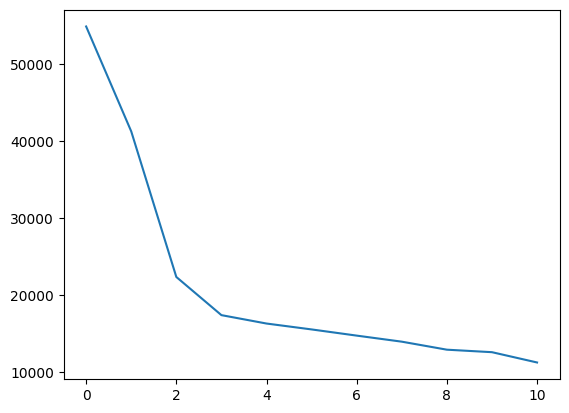

In [60]:
import matplotlib.pyplot as plt
plt.plot(pca.singular_values_)

In [62]:
# media del dataset originale la ritroviamo in pca.mean_
d.mean(axis=0) - pca.mean_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

(Aggarwal 2.8)

Repeat the previous exercise using SVD (hint: svd implemented in numpy.linalg.svd)

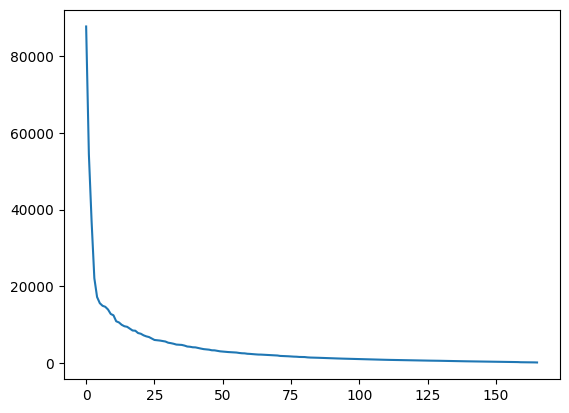

In [75]:
from numpy.linalg import svd

sigma=svd(d, compute_uv=False)
plt.plot(sigma)

In [76]:
from numpy.linalg import matrix_rank

matrix_rank(d)

np.int64(166)

In [64]:
sigma

array([87765.40969139, 54418.11086264, 36875.51290651, 22121.42906393,
       17210.02170661, 15603.09618991, 14927.74822205, 14658.7644761 ,
       13956.90584937, 12791.33894184, 12441.02471382, 10883.81197844,
       10582.02186257,  9965.83064669,  9587.1649647 ,  9437.81694782,
        8954.92853802,  8480.78707334,  8416.90689728,  7813.45987199,
        7635.13401107,  7225.05323874,  6951.33767471,  6769.85369701,
        6399.78373646,  6011.7371573 ,  5939.4473699 ,  5853.30656476,
        5726.58529452,  5607.00961218,  5298.78704111,  5177.72766881,
        5020.64742764,  4811.47478017,  4763.44212362,  4716.20393553,
        4540.98812126,  4299.93751702,  4238.71090043,  4103.76772528,
        4074.07181305,  3906.96446117,  3763.37122662,  3620.89484095,
        3545.67337252,  3476.28474976,  3318.82008602,  3300.70111709,
        3179.69565626,  3048.23621602,  2976.85053712,  2925.20060587,
        2857.71678223,  2807.22905549,  2739.18491477,  2730.47043512,
      

In [78]:
# centralizzo il dataset e ricalcolo SVD
d2 = d - d.mean(axis=0)
sigma2 = svd(d2, compute_uv=False)

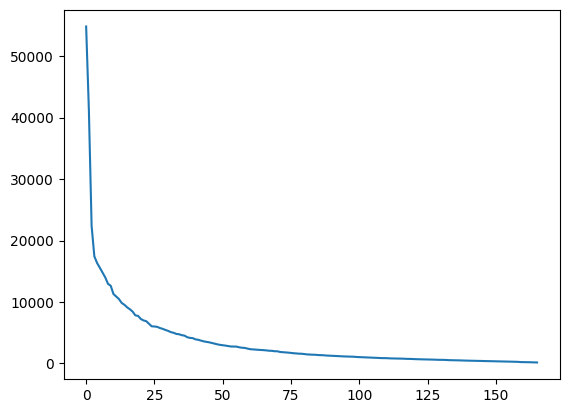

In [79]:
plt.plot(sigma2)

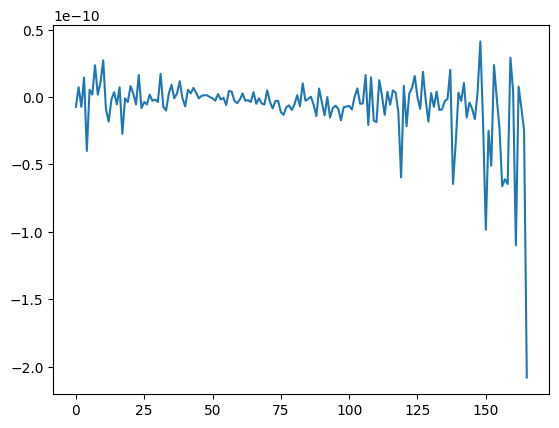

In [81]:
# la sigma ottenuta dalla matrice del dataset centrata sulla media
# è uguale ai valori singolari di PCA
pca = PCA()
pca.fit(d)
plt.plot(sigma2-pca.singular_values_)

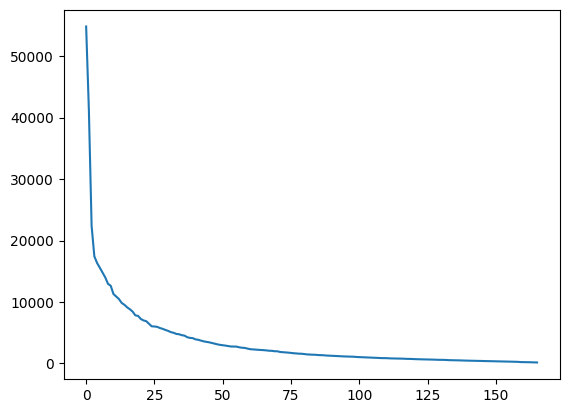

In [82]:
plt.plot(pca.singular_values_)

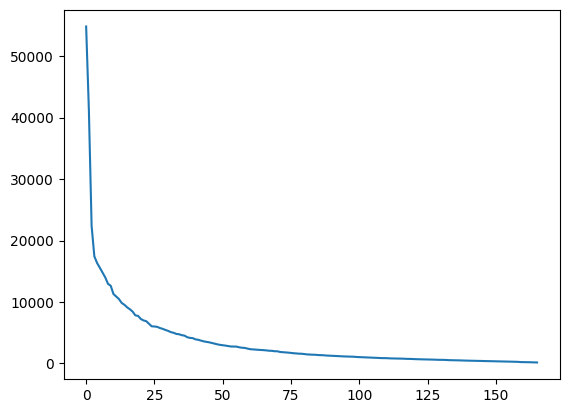

In [71]:
# Faccio PCA di dati a media nulla
# i valori singolari non cambiano perchè PCA centra il dataset sulla media
pca.fit(d2)
plt.plot(pca.singular_values_)

In [83]:
# Calcolo PCA come eigendecomposition della matrice di covarianza
from numpy.linalg import eig

C = np.matmul(d2.T, d2)
l,v = eig(C)

In [84]:
v.shape

(166, 166)

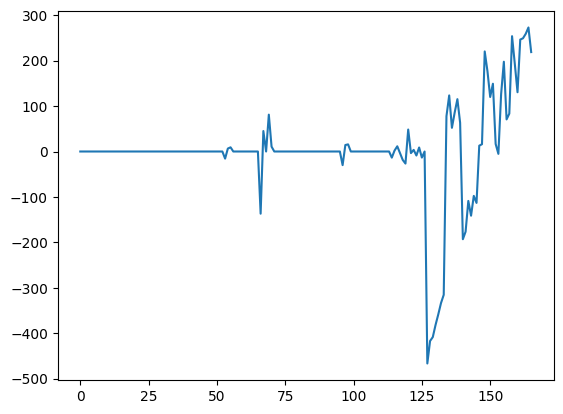

In [85]:
# gli autovalori della matrice di covarianza non sono ordinati correttamente
# e sembrano diversi dai singular values PCA. Basta ordinarli.
plt.plot(np.sqrt(l)-pca.singular_values_)

In [86]:
# Ordino le radici quadrate degli autovalori e visualizzo in ordine inverso
np.sort(np.sqrt(l))[::-1]

array([54850.42103375, 41247.0446625 , 22372.88299965, 17424.14411487,
       16335.2392005 , 15570.89807338, 14769.08518471, 13983.96874878,
       12944.77414756, 12620.46513966, 11285.91804573, 10864.11081087,
       10466.23239696,  9835.90040698,  9533.89993279,  9119.74218145,
        8806.12180425,  8423.24075288,  7813.57168988,  7722.45870907,
        7226.20508032,  6985.99901194,  6856.68146856,  6428.66598781,
        6024.10207911,  5999.93424694,  5935.02701125,  5746.11739155,
        5614.88353001,  5436.01366743,  5283.32655869,  5079.9672104 ,
        4970.59134518,  4786.46875876,  4734.10713833,  4582.00238104,
        4509.5156342 ,  4247.08148331,  4142.00747691,  4101.76748586,
        3907.71266195,  3832.2165028 ,  3703.23828179,  3575.80922415,
        3501.74823995,  3418.61347361,  3318.31761786,  3197.41004904,
        3090.62946792,  3006.35618401,  2954.20672127,  2884.13111251,
        2811.07184771,  2739.40759551,  2732.93202121,  2723.74244004,
      

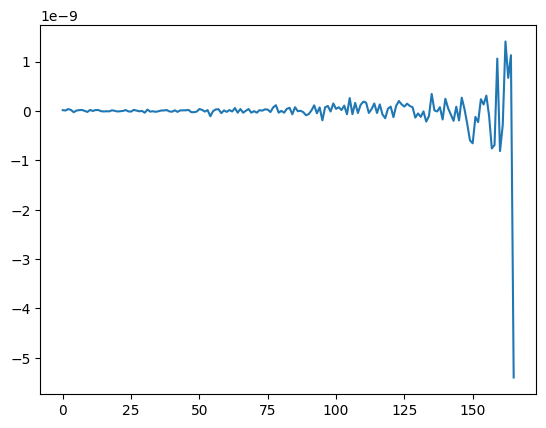

In [87]:
plt.plot(np.sort(np.sqrt(l))[::-1] - pca.singular_values_)

In [88]:
# Gli autovettori della matrice di covarianza sono ortonormali
# per cui v * v.T deve essere la natrice I
np.matmul(v, v.T)

array([[ 1.00000000e+00, -1.52983548e-13, -1.40809678e-13, ...,
         4.66959482e-14, -1.57071860e-14,  4.16007474e-15],
       [-1.52983548e-13,  1.00000000e+00, -8.07118058e-14, ...,
         2.06772373e-14, -1.20053499e-14, -7.58714657e-15],
       [-1.40809678e-13, -8.07118058e-14,  1.00000000e+00, ...,
        -2.81775871e-14,  1.44606253e-14,  5.14460037e-15],
       ...,
       [ 4.66959482e-14,  2.06772373e-14, -2.81775871e-14, ...,
         1.00000000e+00, -2.16637379e-14,  3.66062062e-15],
       [-1.57071860e-14, -1.20053499e-14,  1.44606253e-14, ...,
        -2.16637379e-14,  1.00000000e+00, -1.63452444e-14],
       [ 4.16007474e-15, -7.58714657e-15,  5.14460037e-15, ...,
         3.66062062e-15, -1.63452444e-14,  1.00000000e+00]])